# Reading in Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

In [2]:
train = pd.read_csv('../input/santander-fe-train-and-test/fe_train.csv')
test = pd.read_csv('../input/santander-fe-train-and-test/fe_test.csv')

In [10]:
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,...,zscore_var_160,zscore_var_161,zscore_var_162,zscore_var_163,zscore_var_164,zscore_var_165,zscore_var_166,zscore_var_167,zscore_var_168,zscore_var_169,zscore_var_170,zscore_var_171,zscore_var_172,zscore_var_173,zscore_var_174,zscore_var_175,zscore_var_176,zscore_var_177,zscore_var_178,zscore_var_179,zscore_var_180,zscore_var_181,zscore_var_182,zscore_var_183,zscore_var_184,zscore_var_185,zscore_var_186,zscore_var_187,zscore_var_188,zscore_var_189,zscore_var_190,zscore_var_191,zscore_var_192,zscore_var_193,zscore_var_194,zscore_var_195,zscore_var_196,zscore_var_197,zscore_var_198,zscore_var_199
0,0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,...,-0.808960,-1.468271,-1.230615,-1.133354,1.749411,-1.323868,-0.711242,0.442889,1.500643,-0.400903,-1.075694,-1.411977,0.122226,0.642077,-0.231051,-1.347886,-0.974844,0.700358,-0.291945,-0.311274,-1.076444,-0.779319,0.261796,1.251421,1.404028,2.086627,0.900013,-0.810462,0.556995,-0.164257,0.263373,-1.149155,0.817467,-0.411012,0.168704,-1.578113,1.022128,-0.373967,-1.026395,0.214134
1,1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,...,0.480255,1.078321,-1.086280,0.918392,-0.392136,-0.832226,0.640992,1.727407,-0.339674,0.443626,1.252709,1.102746,0.255460,1.037658,1.408804,-0.395486,-0.590318,1.783703,-0.738202,3.031043,-0.542084,-0.435698,-1.743652,0.146463,1.050347,-0.186012,-0.412562,-0.483542,-0.522150,-1.129384,0.966609,0.093604,0.443622,1.908760,-0.817592,1.522338,1.067651,-0.129399,0.825415,0.505684
2,2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,...,-1.015812,0.967739,-0.460898,-1.004944,0.335467,0.237540,0.853877,-0.185181,0.766416,0.359985,-1.601886,-0.572670,-1.447999,-0.862362,0.766675,-0.249091,0.331276,-1.156050,-1.012474,-0.067934,-0.294956,-0.506405,-1.560106,-1.254678,1.108565,-0.278665,-1.127287,0.351546,-1.314143,-1.626236,-0.072093,0.777995,-0.174130,-0.412315,1.151588,2.297364,-1.617902,-0.695139,-0.381448,0.356681
3,3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,...,0.700718,1.537625,1.300005,-1.351614,-1.505427,-0.411122,-1.015014,0.185862,-1.407934,-0.793121,-1.615763,-0.996693,-0.182207,2.076763,-0.765422,-1.223758,1.953261,0.788265,-1.102127,1.109219,-0.192527,-1.220107,0.131589,-0.337210,-1.418779,0.832449,-0.325001,-0.215371,-0.751603,1.129544,0.270215,-0.891454,-0.818466,-0.478547,1.607865,-0.789515,-0.959017,1.501741,0.697116,-0.543500
4,4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,...,0.850292,0.284518,0.072839,1.371694,1.731253,0.387117,0.722413,0.304597,-0.582367,-0.227937,0.

In [11]:
del train['Unnamed: 0']

In [13]:
X_train = train.iloc[:, 2:].values.astype('float64')
y_train = train['target'].values

# Training and Evaluating the Model

Now we are ready to train our model. We combine the quantile transformer and Gaussian naive Bayes classifer, [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), into a pipeline using [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('quantiletransformer', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='normal', random_state=None,
          subsample=100000)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))])

0.8919624692748126

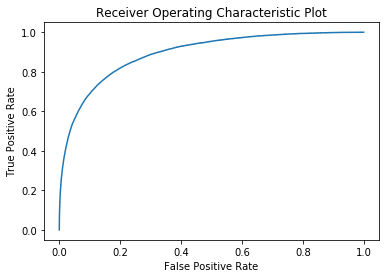

In [15]:
# AUC Plot

fpr, tpr, thr = roc_curve(y_train, pipeline.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
auc(fpr, tpr)

In [16]:
# 5 fold cross validation score with "cross_val_score"

from sklearn.model_selection import cross_val_score

cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=5).mean()

0.8900235177982193

In [7]:
# from sklearn.metrics import roc_auc_score

# pipeline.fit(X_train, y_train)
# model = pipeline.named_steps['gaussiannb']
# size = 1000000
# size0 = int(size * model.class_prior_[0])
# size1 = size - size0
# sample0 = np.concatenate([[np.random.normal(i, j, size=size0)]
#                           for i, j in zip(model.theta_[0], np.sqrt(model.sigma_[0]))]).T
# sample1 = np.concatenate([[np.random.normal(i, j, size=size1)]
#                           for i, j in zip(model.theta_[1], np.sqrt(model.sigma_[1]))]).T
# X_sample = np.concatenate([sample0, sample1])
# y_sample = np.concatenate([np.zeros(size0), np.ones(size1)])
# roc_auc_score(y_sample, model.predict_proba(X_sample)[:,1])

# Submit Prediction

In [8]:
# X_test = test.iloc[:, 1:].values.astype('float64')
# submission = pd.read_csv('../input/santander-customer-transaction-prediction/sample_submission.csv')
# submission['target'] = pipeline.predict_proba(X_test)[:,1]
# submission.to_csv('submission.csv', index=False)